In [1]:
import os, sys
my_path = os.getcwd()+"/.."
print(my_path)
sys.path.append(my_path)

import numpy as np
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline


#Ensembler
##COde
from ensembler.potentials.OneD import harmonicOscillator
from ensembler.integrator import monteCarloIntegrator, metropolisMonteCarloIntegrator
from ensembler.integrator import positionVerletIntegrator, leapFrogIntegrator
from ensembler.system import system

##Visualisation
from ensembler.visualisation.plotSimulations import static_sim_plots
from ensembler.visualisation.animationSimulation import animation_trajectory, animation_EDS_trajectory


c:\Users\benja\OneDrive - ETHZ\PhD\Code\ensembler_riniker_develop\examples/..
SYSTEM ASSIGNS random POSITION FOR: states: 2	nDim: 1


# Plots of Simulations

## Stochastic Integrators

SYSTEM ASSIGNS random POSITION FOR: states: 1	nDim: 1
Simulation: 100%|██████████| 250/250 [00:00<00:00, 303.40it/s]


(None, <Figure size 1152x288 with 3 Axes>)

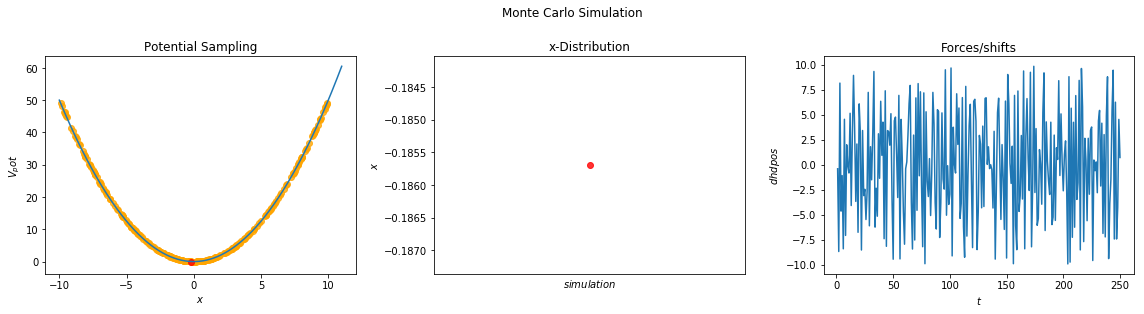

In [2]:
#Simple Monte Carlo simulation:
#settings
sim_steps = 250
x_min, x_max = (-10, 10)
max_step_size = 2.0
pot=harmonicOscillat8r()
integrator = monteCarloIntegrator(spaceRange=[x_min, x_max])#maxStepSize=max_step_size,
sys=system(potential=pot, integrator=integrator)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True)

#plot
static_sim_plots(sys, title="Monte Carlo Simulation", x_range=list(range(-10,11)))

Simulation: 100%|██████████| 250/250 [00:00<00:00, 343.40it/s]


(None, <Figure size 1152x288 with 3 Axes>)

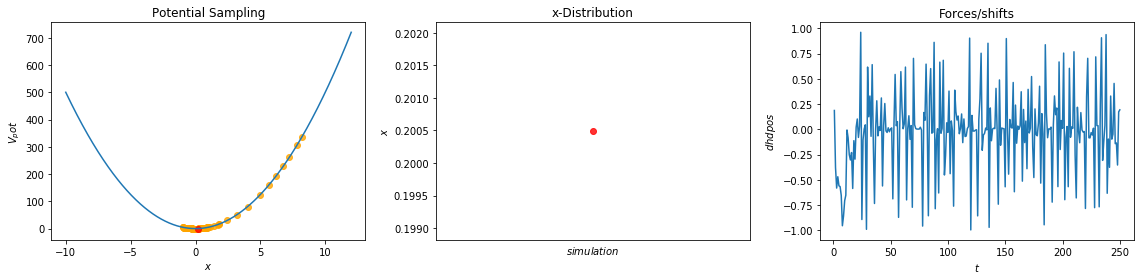

In [9]:
#Simple metropolis Monte Carlo simulation
#settings
sim_steps=250
#criterion= lambda ene_new, currentState: (ene_new < currentState.totPotEnergy)
x_min, x_max = (-14, 14)

pot=harmonicOscillator(k=10)
integrator = metropolisMonteCarloIntegrator()# metropolisCriterion=criterion (spaceRange=[min(x2), max(x2)], maxStepSize=max_step_size,
sys=system(potential=pot, integrator=integrator, position=8)

#simulate
cur_state = sys.simulate(steps=sim_steps, withdrawTraj=True)

#plot
static_sim_plots(sys, x_range=[-10,11])

## Newtonian Integrator

### Position Verlet

Simulation: 100%|██████████| 250/250 [00:00<00:00, 512.24it/s]


(None, <Figure size 1152x288 with 3 Axes>)

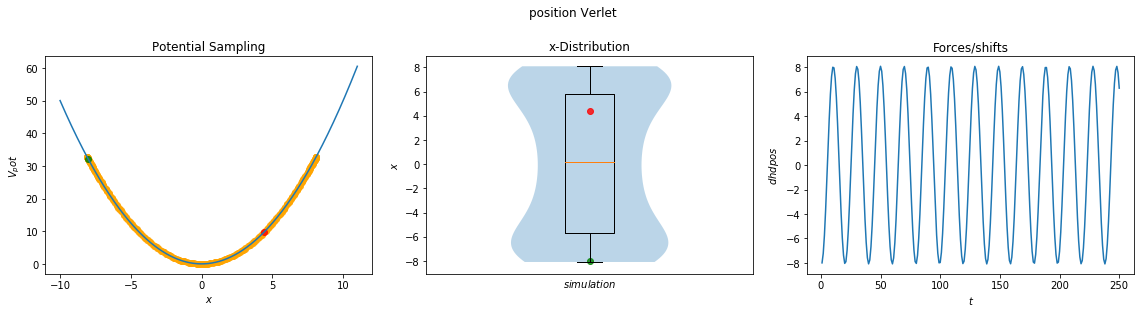

In [10]:
#Simple Position Verlet integration simulation:

#settings
sim_steps = 250
x_min, x_max = (-10, 10)
max_step_size = 2.0
pot=harmonicOscillator()
integrator = positionVerletIntegrator(dt=0.1)#maxStepSize=max_step_size,
sys=system(potential=pot, integrator=integrator, position=-8)

integrator.verbose= False
sys.init_velocities()

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True, initSystem=False)

#plot
static_sim_plots(sys, title="position Verlet", x_range=list(range(-10,11)))

In [11]:
max(sys.trajectory.position)

8.085536177226652

### Leap Frog

In [6]:
#Leap Frog integration simulation:

#settings
sim_steps = 250
x_min, x_max = (-10, 10)
max_step_size = 2.0
pot=harmonicOscillator()
integrator = leapFrogIntegrator(dt=0.1)#maxStepSize=max_step_size,
sys=system(potential=pot, integrator=integrator, position=-8)

integrator.verbose= False
#simulate
sys._currentVelocities = 0
print(sys._currentVelocities)
cur_state = sys.simulate(sim_steps, withdrawTraj=True, initSystem=False)
print("init_state", sys.trajectory[0], "\n")
print("last_state: ",  sys.trajectory[-1], "\n")
print("Trajectory length: ",len(sys.trajectory))
#plot
static_sim_plots(sys, title="position Verlet", x_range=list(range(-10,11)))

0


# Animations of Simulations

## Stochastic Integrators

## super  Monte Carlo Simulation:

In [ ]:
#super easy Metropolis_MonteCarlo simulation
#settings
space_range = [-10, 10]
sim_steps=100
pot=harmonicOscillator(k=2)
integrator = metropolisMonteCarloIntegrator(randomnessIncreaseFactor=5) 
sys=system(potential=pot, integrator=integrator,  position=9)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True) #500000, withdrawTraj=True)
print("last_state: ", cur_state)
print(len(sys.trajectory))


#plot
ani, out_path = animation_trajectory(sys, x_range=space_range, title="Metropolis Monte Carlo Simulation")

##put it into jupyter:
import tempfile
os.chdir(tempfile.gettempdir())
from IPython.display import HTML
HTML(ani.to_jshtml())


Simulation: 100%|██████████| 200/200 [00:00<00:00, 434.78it/s]
Trajectory length:201


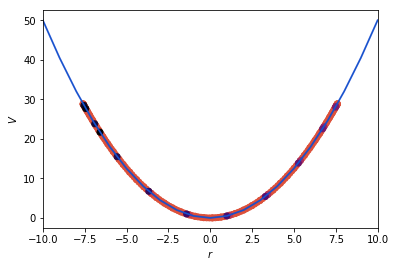

In [5]:
#Simple Verlet integration simulation:
#UNDER DEVELOPMENT!The temperature is not constant!!! -- BUGGY!
#settings
sim_steps = 200
x_min, x_max = (-10, 10)
max_step_size = 2.0
pot=harmonicOscillator()
integrator = positionVerletIntegrator(dt=0.1)#maxStepSize=max_step_size,
sys=system(potential=pot, integrator=integrator, position=-7.5)
sys._currentVelocities = 0

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True, initSystem=False)
#print("init_state", sys.trajectory[0], "\n")
#print("last_state: ",  sys.trajectory[-1], "\n")
print("Trajectory length: ",len(sys.trajectory))

#animation
ani, out_path = animation_trajectory(sys, [x_min, x_max])

import tempfile
os.chdir(tempfile.gettempdir())
from IPython.display import HTML
HTML(ani.to_jshtml())

# EDS MMC sims

In [3]:
from ensembler.potentials.OneD import envelopedPotential

#Metropolis Monte Carlo Simulation for EDS
##Construct potential
fc=2
Eoffs=(0, 0, 0, 1, -1)
positions = [x / float(10) for x in range(-300, 301)]
V_is=[harmonicOscillator(x_shift=-20, k=fc), harmonicOscillator(x_shift=20, k=fc),
      harmonicOscillator(x_shift=10, k=fc), harmonicOscillator(x_shift=-10, k=fc), harmonicOscillator(x_shift=0, k=fc)]
eds_pot = envelopedPotential(V_is=V_is, s=1.0, Eoff_i=Eoffs)

#Build System
integrator = metropolisMonteCarloIntegrator(minStepSize=1) 
sys=system(potential=eds_pot, integrator=integrator,  position=20, verbose=False)


#simulate
values = [1.0, 0.09, 0.07,  0.05, 0.04, 0.03, 0.02, 0.01]
svals = values+list(reversed(values))
sequence_repeats = 1
each_sim = 500
total_s_sim = svals*sequence_repeats
number_s = len(total_s_sim)

print("Progress: ", end="")
for ind,s in enumerate(total_s_sim):
    if(((ind/number_s)*100)%10 == 0): print(str((ind/number_s)*100)+"%", end="\t")
    sys.potential.s = s
    cur_state = sys.simulate(each_sim, withdrawTraj=False)
    
print()
print("last_state: ", cur_state)
print(len(sys.trajectory)) 


import tempfile
tmp_dir = tempfile.gettempdir()
os.chdir(tmp_dir)

sys.potential._set_multiPos_mode()
sys.potential._set_type_check()



Simulation: 100%|██████████| 500/500 [00:09<00:00, 53.54it/s]

last_state:State(position=-10, temperature=nan, totEnergy=-1.0, totPotEnergy=-1.0, totKinEnergy=nan, dhdpos=1, velocity=None)
8000


TypeError: 'numpy.float64' object is not iterable

In [18]:
#Metropolis Monte Carlo Simulation for EDS
##Construct potential
fc=5
Eoffs=(0, 0)
V_is=[harmonicOscillator(x_shift=4, k=fc), harmonicOscillator(x_shift=-4, k=fc)]
eds_pot = envelopedPotential(V_is=V_is, s=1.0, Eoff_i=Eoffs)

#Build System
integrator = metropolisMonteCarloIntegrator() 
sys=system(potential=eds_pot, integrator=integrator,  position=20)
del sys.trajectory[:]


#simulate
values = [1.0,  0.01]
svals = values+list(reversed(values))
each_sim = 1
for s in svals*1:
    sys.potential.s = s
    cur_state = sys.simulate(each_sim, withdrawTraj=False)
print("last_state: ", cur_state)
print(len(sys.trajectory))



import tempfile
tmp_dir = tempfile.gettempdir()
os.chdir(tmp_dir)


#animation
tmp_dir = "/home/bschroed"
out_path=tmp_dir+"/harmOsc.mp4"
out_path = None
#matplotlib.rcParams['animation.embed_limit'] = 20971520*3#if three is not enough storage

ani, out_path = animation_EDS_trajectory(sys, x_range=[-10,10], 
                                         s_values=list(set(svals)), step_size=10, 
                                         out_path=out_path,  tot_pot_resolution=200)
print(tmp_dir)

from IPython.display import HTML
HTML(ani.to_jshtml())



TypeError: 'slice(None, None, None)' is an invalid key

In [16]:
#Metropolis Monte Carlo Simulation for EDS
##Construct potential
fc=5
Eoffs=(0, 0)
V_is=[harmonicOscillator(x_shift=4, fc=fc), harmonicOscillator(x_shift=-4, fc=fc)]
eds_pot = envelopedPotential(V_is=V_is, s=1.0, Eoff_i=Eoffs)

#Build System
integrator = metropolisMonteCarloIntegrator() 
sys=system(potential=eds_pot, integrator=integrator) #,  position=20)
del sys.trajectory[:]


#simulate
values = [1.0,  0.05, 0.03, 0.0125, 0.01]
svals = values+list(reversed(values))
each_sim = 200
for s in svals*3:
    sys.potential.s = s
    cur_state = sys.simulate(each_sim, withdrawTraj=False)
print("last_state: ", cur_state)
print(len(sys.trajectory))



import tempfile
tmp_dir = tempfile.gettempdir()
os.chdir(tmp_dir)


#animation
tmp_dir = "/home/bschroed"
out_path=tmp_dir+"/harmOsc.mp4"
out_path = None

ani, out_path = animation_EDS_trajectory(sys, x_range=[-10,10], 
                                         s_values=list(set(svals)), step_size=10, 
                                         out_path=out_path, out_writer="ffmpeg", dpi=600, tot_pot_resolution=1000)
print(tmp_dir)

from IPython.display import HTML
HTML(ani.to_jshtml())

NameError: name 'harmonicOsc' is not defined

In [0]:
#Newton Simulation for EDS
##Construct potential
fc=20
Eoffs=(0, 0)
V_is=[harmonicOsc(x_shift=7, fc=fc), harmonicOsc(x_shift=-7, fc=fc)]
eds_pot = envelopedPotential(V_is=V_is, s=1.0, Eoff_i=Eoffs)

#Build System
integrator = positionVerletIntegrator(dt=1)#maxStepSize=max_step_size,
sys=system(potential=eds_pot, integrator=integrator) #,  position=20)
del sys.trajectory[:]


#simulate
values = [1.0, 0.001]
svals = values+list(reversed(values))
for s in svals*4:
    sys.potential.s = s
    cur_state = sys.simulate(200, withdrawTraj=False)
print("last_state: ", cur_state)
print(len(sys.trajectory))



import tempfile
tmp_dir = tempfile.gettempdir()
os.chdir(tmp_dir)


#animation
tmp_dir = "/home/bschroed"
out_path=tmp_dir+"/harmOsc.mp4"
out_path = None

ani, out_path = animation_EDS_trajectory(sys, x_range=[-10,10], s_values=list(set(svals)), step_size=1)

from IPython.display import HTML
HTML(ani.to_jshtml())

